# ML Hackaton                  otto group multi-classification
# Total number of nine classes, but about 93 features...
# MLP/softmax function, using ReLU as activition function
# logistic regression?


# How to determine useful features without training or using L1 regularization to do feature selection?
# Correlation between features?

In [160]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample



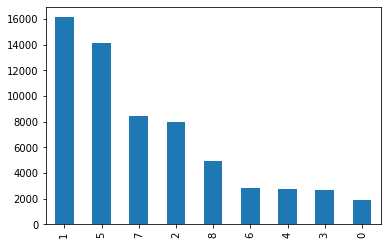

In [222]:
d = {"Class_1": 0, "Class_2": 1, "Class_3": 2, "Class_4": 3, "Class_5": 4, "Class_6": 5, "Class_7": 6, "Class_8": 7, "Class_9": 8,}
df = pd.read_csv("Data for Otto Group/train.csv")
df["target"] = df["target"].map(d)
df["target"].value_counts().plot.bar()
df = df.drop("id", 1)
X = df.drop("target", 1)
Y = df["target"]
# the graph below shows imbalanced labels in dataset, which may affects prediction of this model

In [223]:
'''   this doesn't work...
# resamplnig data to balance labels
df_majority = df[df.target == 1]
df_minority = df[df.target != 1]
l = [0, 2, 3, 4, 5, 6, 7, 8]


for value in l:
    df_minority_resampled = resample(df_minority[df.target == value], replace=True, n_samples=16000, random_state=123)
    df_majority = pd.concat([df_minority_resampled, df_majority])

#df_balanced = pd.concat([df_minority_resampled, df_majority])

df_majority["target"].value_counts().plot.bar()

X = df_majority.drop("target", 1)
Y = df_majority["target"]
#df_upsample_balanced = pd.concat([df_minority_resampled, df_minority])
#df_upsample_balanced["target"].value_counts().plot.bar()
'''

'\n# resamplnig data to balance labels\ndf_majority = df[df.target == 1]\ndf_minority = df[df.target != 1]\nl = [0, 2, 3, 4, 5, 6, 7, 8]\n\n\nfor value in l:\n    df_minority_resampled = resample(df_minority[df.target == value], replace=True, n_samples=16000, random_state=123)\n    df_majority = pd.concat([df_minority_resampled, df_majority])\n\n#df_balanced = pd.concat([df_minority_resampled, df_majority])\n\ndf_majority["target"].value_counts().plot.bar()\n\nX = df_majority.drop("target", 1)\nY = df_majority["target"]\n#df_upsample_balanced = pd.concat([df_minority_resampled, df_minority])\n#df_upsample_balanced["target"].value_counts().plot.bar()\n'

In [224]:
X

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61874,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61875,0,0,0,0,0,0,0,3,1,0,...,0,0,3,1,0,0,0,0,0,0
61876,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,10,0


In [225]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int64

In [242]:
# making MLP classifier
#x, y = make_classification(n_samples=200, n_classes=9, random_state=1, n_clusters_per_class=1, n_informative=5)

# split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# rescale train data to decrease sensitivity of model to the data
sc = StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 5), max_iter=500, activation='relu', solver='adam').fit(trainX_scaled, Y_train)


In [243]:
#clf.predict_proba(X_test[:1])
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
# only get 0.79 on accuracy...

Accuracy: 0.77


              precision    recall  f1-score   support

           0       0.38      0.63      0.48       605
           1       0.81      0.69      0.75      9441
           2       0.41      0.52      0.46      3128
           3       0.45      0.61      0.51      1022
           4       0.94      0.96      0.95      1350
           5       0.92      0.93      0.93      7012
           6       0.65      0.66      0.65      1387
           7       0.89      0.87      0.88      4318
           8       0.86      0.81      0.84      2676

    accuracy                           0.77     30939
   macro avg       0.70      0.74      0.72     30939
weighted avg       0.79      0.77      0.78     30939



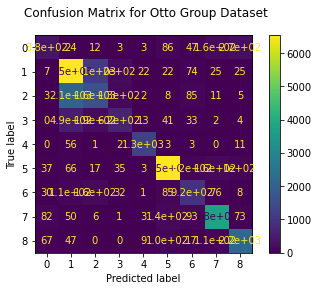

In [244]:
print(classification_report(y_pred, Y_test))
fig = plot_confusion_matrix(clf, testX_scaled, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Otto Group Dataset")
plt.show()

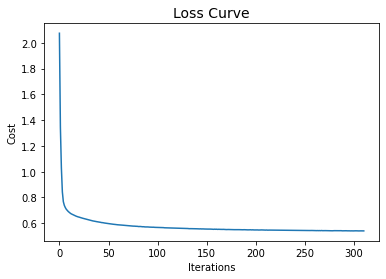

In [245]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()